## Classification
* 주어진 상황이 어느 라벨(class)에 해당하는지와 해당할 확률을 예측하는 것.
* 일반적으로 각 클래스에 해당할 확률을 예측한 후, 확룔이 가장 높은 클래스로 분류함

## Logistic Regression
* 연속형 숫자가 아닌 이진 타입/binary 타입인 데이터를 분석하기 위한 multi linear regression

### logistic Response Function / Logit
* 확률의 (0, 1) scale을, linear model 분석의 적합한 scale(∞, -∞)로 변환하는 함수
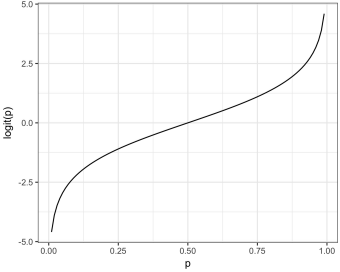

* logistic regression은 (∞, -∞)의 값을 계산하며, 이를 inverse logit / logistic response function에 적용하여   
주어진 데이터의 label이 '1'일 확률인 p를 구함
* sigmoid function / logistic function을 적용하며, 형태는 아래와 같음 ~ (1)
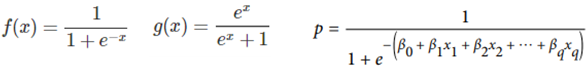
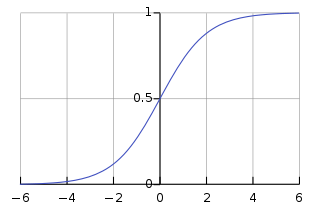


* 위 p에 대한 식을 일반적인 multiple linear model 형태로 변환하기 위해 odds 개념 적용
* odds: 실패 확률에 대한 성공 확률의 비 / 성공 확률이 실패 확률보다 몇 배 높은지 표현할 수 있음   
예) 어떤 사건의 성공 확률이 75%(0.75)면 실패 확률은 25%(0.25)이고 이때의 odds는 0.75/0.25 = 3.0

즉 odds의 계산식을 성공 확률 p로 표현하면 ~ (2)
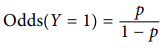

역으로 p를 odds를 사용하여 표현하면
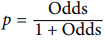

(1)의 p를 (2)에 대입하면 ~ (3)
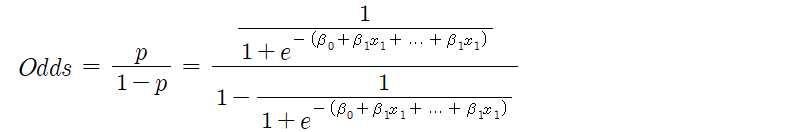
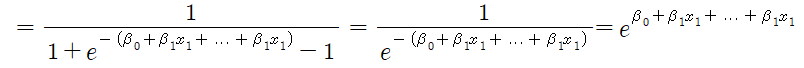

식 (3)의 양변에 로그를 취하면, multiple linear regression 모델의 형태가 됨 => logistic regression
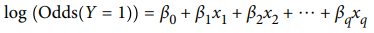

즉 기존 multiple linear regression 형태의 logistic regression 모델을 실행하면,   
결과값은 성공확룔 p의 logit 변환값(log odds 값)을 반환.   
p는 모델 수행 결과에 inverse logit 함수를 적용하여 구할 수 있음

p에는 cut-off / threshold를 두어, 이상이면 label은 '1' 그렇지 않으면 '0'으로 결정   
(defalut threshold = 0.5)

In [ ]:
# 데이터셋 분석

In [ ]:
# sklearn을 사용하여 logistic regression 구현

### Prediction Values from Logistic Regression
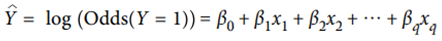
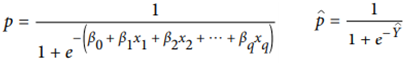

In [ ]:
# sklearn 모델의 logistic regression에서 predict 사용시 반환하는 값

### Logistic regression에서 회귀계수의 의미
* logistic regression에서 계수는 해당 변수의 odds ratio에 log를 취한 값을 의미함


* odds ratio: 0dds 간 비율   
(binary factor variable X에 대한 odds ratio 예시)
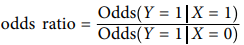
: (X=1일 때 Y=1일 Odds) / (X=0일 때 Y=1일 Odds) -> X=0일 때와 비교하여 X=1일 때 Y=1인 경우가 몇배 더 증가하는지


* 즉, 변수 Age의 계수가	2.3이라면, 나이 단위가 증가하면 어린 것보다 구매할 확률이 9.97(np.exp(2.3)) 정도 높아진다고 해석할 수 있음
* 계수의 양수/음수 여부로, 변수와 성공확률이 양의 상관관계 / 음의 상관관계를 가지는지 알 수 있음

### Logistic Regression 모델 및 변수 평가

In [ ]:
# statsmodels 패키지를 사용하여 모델을 구성하는 변수의 coef 평가

## Evaluationg Classification Models
### 혼동행렬 confusion matrix
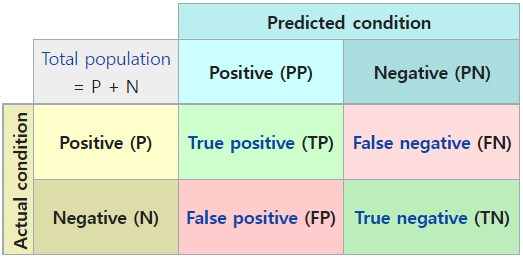
* 두가지 선택에 대해, 더 가치있다고 판단하는 일을 positive(1)로 취급함   
환자에 대한 Cancer/Non-Cancer - Cancer(1), Non-Cancer(0)   
기기에 대한 고장/정상 - 고장(1), 정상(0)
* 일반적으로 (1) case는 (0) case보다 적어, 모두 (0)으로 판단해도 정확도가 높은 경우 존재
* 그러나 (1)을 (1)로 제대로 판별하는게 더 중요한 상황이 많으므로 여러 지표를 고려해야 함

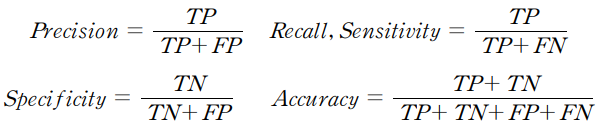
* 정밀도(precision, Positive Predictable Value): 모델이 양성으로 평가한 것 중 실제 양성의 비율
* 재현율(recall), 민감도(sensitivity): 실제 양성 중 모델이 양성으로 평가한 비율
* 특이도(specificity, True Negativity Rate): 실제 음성 중 모델이 음성으로 평가한 비율
* 정확도(accuracy): 전체 중 모델이 올바르게 평가한 비율


* 민감도. 특이도는 bio, medical 분야에서 / 정밀도, 재현율은 기계 학습, 딥러닝 모델 평가 지표로 주로 사용

In [ ]:
# confusion matrix 연산 (coding, sklearn, dmba)
# dmba 설치 명령어: conda install -c conda-forge dmba

### ROC Curve
* sensitivity와 specificity는. 하나가 증가하면 다른 하나는 감소하는 상충 관계를 가짐   
(이상적인 모델은 sensitivity와 specificity가 모두 높음)
* 둘의 관계를 2차원 그래프로 나타낸 것을 "Receiver Operating Characteristics curve(ROC curve)"라고 함
* 일반적으로, 우상향 그래프 모양을 위해 x축은 1-specificity, y축은 sensitivity 값을 가짐

In [ ]:
# sklearn을 사용하여 ROC Curve 그리기

### AUC (Area Under ROC Curve)
* 그림으로 표현되는 ROC Curve를 점수 형태로 표현하기 위해 사용
* AUC = ROC Curve 아래 넓이( ~ 1)
* AUC가 클수록 모델의 분류 성능이 좋다고 판단하며, 모델이 완전히 랜덤으로 분류할 때(학습이 되지 않았을 때) AUC 기댓값은 0.5임

In [ ]:
# sklearn을 사용하여 AUC 계산하기